<h2><b> Assigment Python 1

Nama : Tsaabitah Anggraini

Kode Peserta : PYTN-KS12-023

<h3><b> Project Overview

Kumpulan data ini merupakan catatan kejahatan di wilayah metropolitan utama, seperti London, terjadi dalam pola yang berbeda. Data ini mencakup jumlah laporan kriminal berdasarkan bulan, wilayah LSOA, dan kategori mayor/minor dari Jan 2008 - Des 2016.

Kumpulan data ini berisi:
* lsoa_code: ini mewakili area kepolisian
* borough: wilayah yang terkait dengan statistik
* major_category: kategori kejahatan berat
* minor_category: kategori kejahatan ringan
* nilai: jumlah kejahatan untuk wilayah tertentu, pada bulan tertentu
* tahun: tahun ringkasan statistik
* bulan: bulan ringkasan statistik

<br>

<h3><b> Import Library

In [1]:
import numpy as np
import pandas as pd
import folium
import seaborn as sns

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

<br>

<h3><b> Data Loading

In [2]:
df = pd.read_csv('Dataset/london_crime_by_lsoa.csv')

In [3]:
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [4]:
df.shape

(13490604, 7)

Diketahui dataset ini memiliki 13490604 baris dan 7 kolom

<br>

<h3><b> Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [6]:
df.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [7]:
df.duplicated().sum()

0

Dari proses diatas diketahui bahwa tidak terdapat missing value dan duplikat pada dataset.

<br>

<h3><b> Data Visualization

<h4><b> Bar Chart

<h5> Showing Total Number of Crimes from the top 15 borough for the period 2008 until 2016

In [8]:
df.year.unique()

array([2016, 2015, 2008, 2012, 2010, 2013, 2014, 2011, 2009], dtype=int64)

In [9]:
df.borough.unique()

array(['Croydon', 'Greenwich', 'Bromley', 'Redbridge', 'Wandsworth',
       'Ealing', 'Hounslow', 'Newham', 'Sutton', 'Haringey', 'Lambeth',
       'Richmond upon Thames', 'Hillingdon', 'Havering',
       'Barking and Dagenham', 'Kingston upon Thames', 'Westminster',
       'Hackney', 'Enfield', 'Harrow', 'Lewisham', 'Brent', 'Southwark',
       'Barnet', 'Waltham Forest', 'Camden', 'Bexley',
       'Kensington and Chelsea', 'Islington', 'Tower Hamlets',
       'Hammersmith and Fulham', 'Merton', 'City of London'], dtype=object)

In [10]:
total_crime = df.drop(["lsoa_code", "major_category", "minor_category", "year", "month"], 
                      axis=1).groupby("borough").sum()
total_crime = total_crime.sort_values(by="value", ascending=True)
total_crime_top15 = total_crime.tail(15)
total_crime_top15

,value
borough,
Hillingdon,209680
Barnet,212191
Haringey,213272
Lewisham,215137
Hackney,217119
Brent,227551
Tower Hamlets,228613
Islington,230286
Ealing,251562


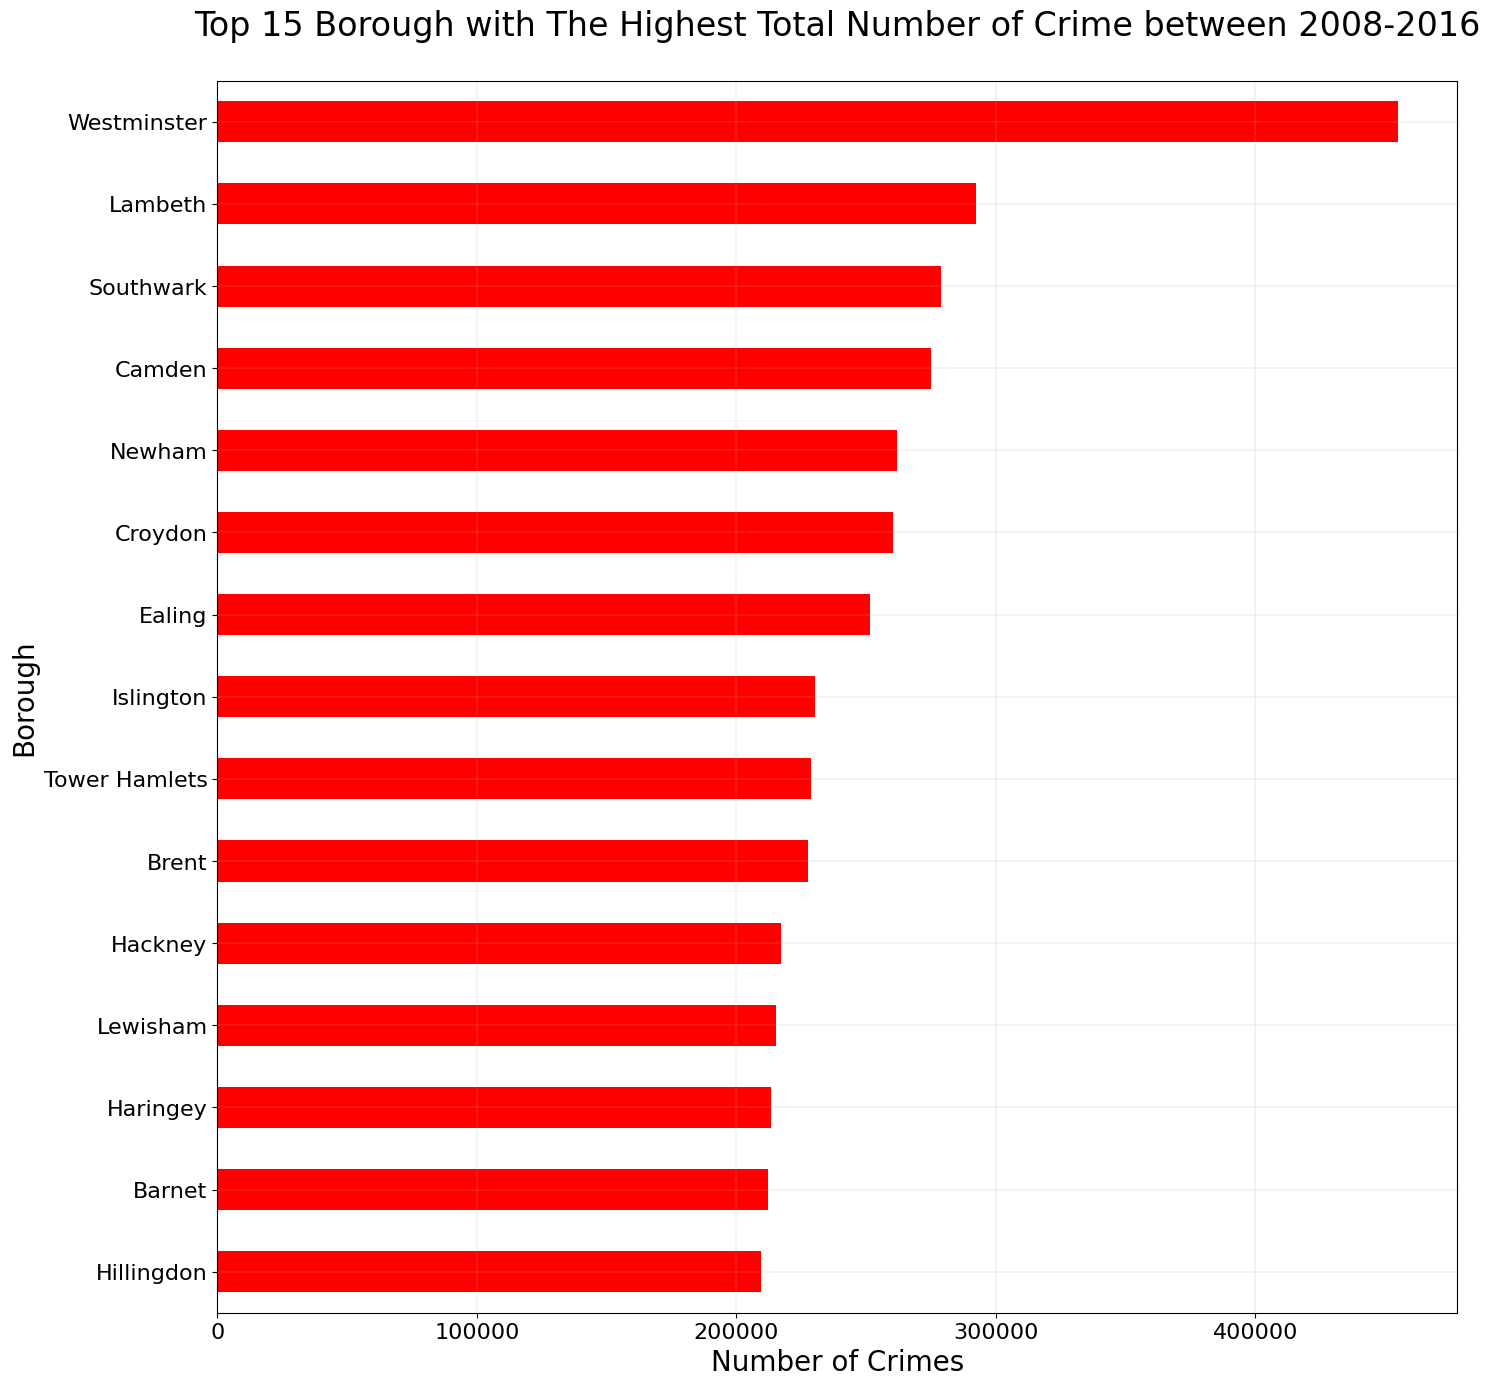

In [11]:
total_crime_top15.plot(kind='barh', figsize=(16,16),legend = False, color='red')

plt.xlabel("Number of Crimes", fontsize = 20)
plt.ylabel("Borough", fontsize = 20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(linewidth=0.2)
plt.title("Top 15 Borough with The Highest Total Number of Crime between 2008-2016", fontsize = 24, y=1.03)

plt.show()

Dari Bar chart diatas dapat dilihat 15 wilayah dengan total kasus kejahatan paling tinggi dengan Westminster berada diurutan pertama.

<h4><b> Pie Chart

<h4> Proportion of Major Crime Category in Westminster from 2008 until 2016

In [12]:
wcrime_proportion = df.drop(["lsoa_code","minor_category","year","month"], axis=1).set_index("borough")
wcrime_proportion = wcrime_proportion.loc["Westminster"]
wcrime_proportion = wcrime_proportion.groupby("major_category").size()
wcrime_proportion

major_category
Burglary                        27648
Criminal Damage                 55188
Drugs                           32616
Fraud or Forgery                 8748
Other Notifiable Offences       21924
Robbery                         25056
Sexual Offences                  3672
Theft and Handling             107136
Violence Against the Person     84672
dtype: int64

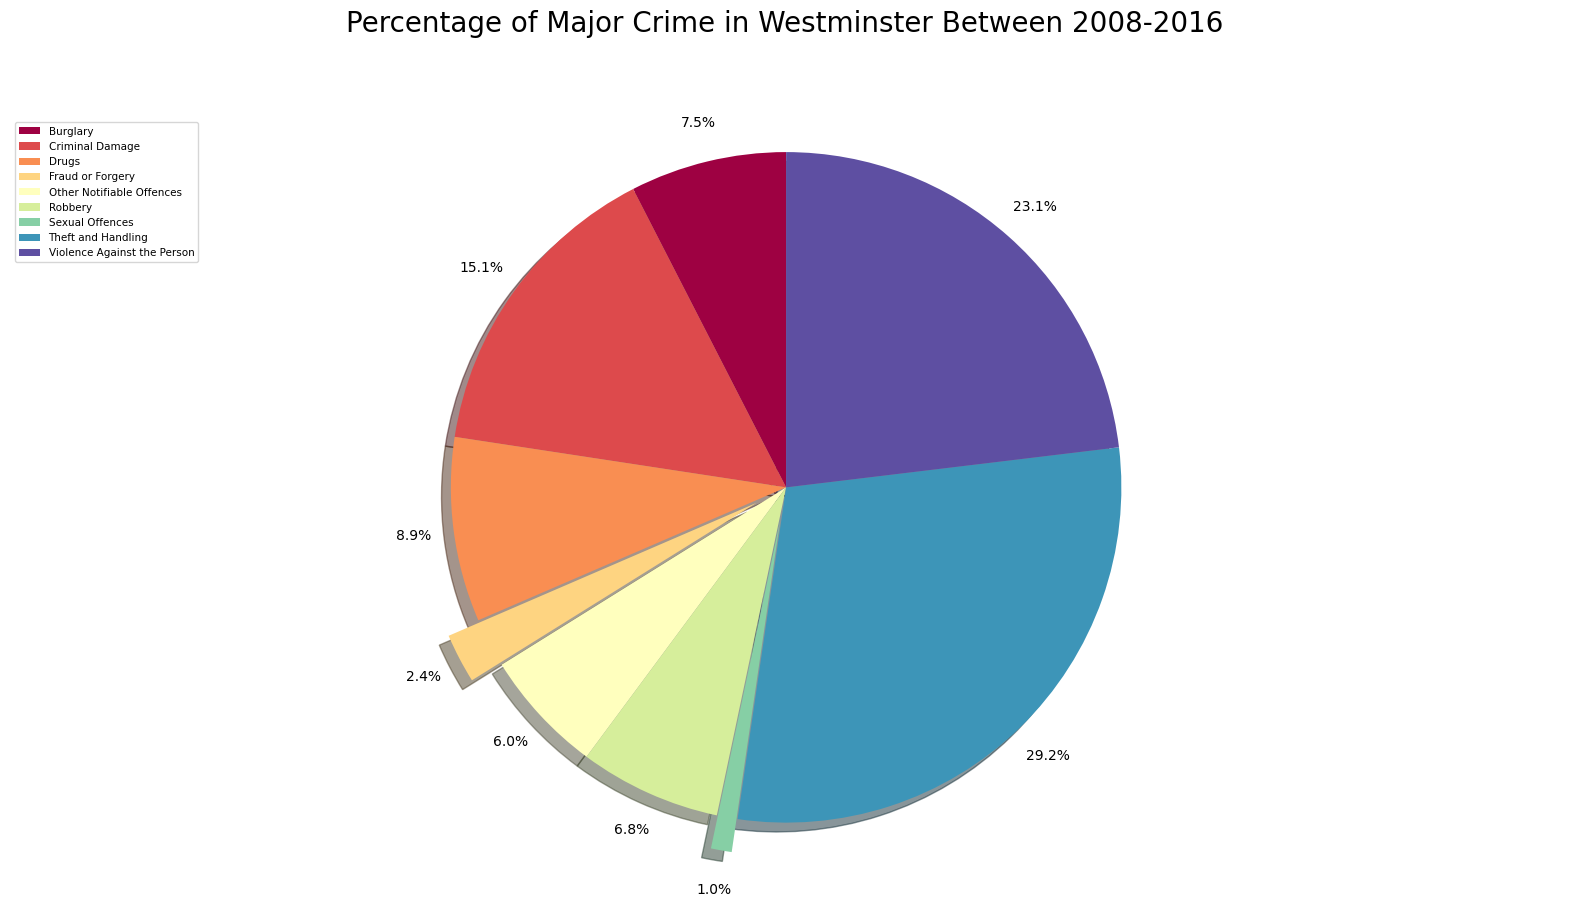

In [13]:
explode_list = explode_list = [0, 0, 0, 0.1, 0, 0, 0.1, 0, 0]

wcrime_proportion.plot(kind="pie",
                     figsize=(20,10),
                     autopct="%1.1f%%",
                     startangle=90,
                     shadow=True,
                     labels=None,
                     cmap='Spectral',
                     explode=explode_list,
                     pctdistance=1.12)

plt.title("Percentage of Major Crime in Westminster Between 2008-2016", fontsize=20, loc="center", y=1.1)

plt.axis('equal')

plt.legend(labels=wcrime_proportion.index, loc="upper left", prop={"size":7.5})

plt.show()

Berdasarkan pie chart di atas, terlihat bahwa persentase kategori kejahatan terbesar di Westminster pada tahun 2008 hingga 2016 adalah Theft and Handling yakni sebesar 29.2% dan terendah adalah kategori Sexual Offence dengan persentasenya yaitu 1.0%. Persentase untuk kategori kejahatan lain juga dapat dilihat pada pie chart di atas.

<h4><b> Area Plot

<h4> Top 5 Major Crime Category in Westminster from 2008 until 2016

In [14]:
wmajor = df['borough'] == 'Westminster'
df_wmajor = df[wmajor]
df_wmajor

,lsoa_code,borough,major_category,minor_category,value,year,month
21,E01004660,Westminster,Theft and Handling,Handling Stolen Goods,0,2012,2
46,E01004678,Westminster,Criminal Damage,Other Criminal Damage,0,2008,11
74,E01032513,Westminster,Violence Against the Person,Wounding/GBH,0,2009,9
134,E01004674,Westminster,Theft and Handling,Motor Vehicle Interference & Tampering,1,2014,4
165,E01004677,Westminster,Theft and Handling,Other Theft Person,0,2015,10
...,...,...,...,...,...,...,...
13490302,E01004711,Westminster,Violence Against the Person,Assault with Injury,1,2015,6
13490346,E01004724,Westminster,Theft and Handling,Theft From Shops,1,2008,9
13490386,E01004654,Westminster,Robbery,Personal Property,0,2009,12
13490545,E01004712,Westminster,Theft and Handling,Other Theft,17,2012,6


In [15]:
top5_wmajor = df_wmajor.drop(["lsoa_code","borough","minor_category","month"], axis=1)
top5_wmajor.set_index("year", inplace=True)
top5_wmajor = top5_wmajor.groupby("major_category").sum()
top5_wmajor = top5_wmajor.sort_values(by="value", ascending=False).head(5)
top5_wmajor

,value
major_category,
Theft and Handling,277617
Violence Against the Person,71448
Drugs,34031
Burglary,29295
Criminal Damage,20405


In [16]:
df_top5wmajor = df_wmajor.drop(["lsoa_code","borough","minor_category","month"], axis=1).set_index("major_category")
df_top5wmajor = df_top5wmajor.loc[top5_wmajor.index]
df_top5wmajor = pd.pivot_table(df_top5wmajor, values="value", aggfunc=np.sum, index="year", columns="major_category")
df_top5wmajor

major_category,Burglary,Criminal Damage,Drugs,Theft and Handling,Violence Against the Person
year,,,,,
2008,2962,2599,4075,29266,6697
2009,2957,2564,3894,29967,7053
2010,2682,2385,4632,29191,7127
2011,2900,2246,5670,33529,7432
2012,4083,2254,4654,38152,7130
2013,3906,2080,4151,33868,6887
2014,3435,2016,2804,28144,8432
2015,3152,2082,2102,27980,9856
2016,3218,2179,2049,27520,10834


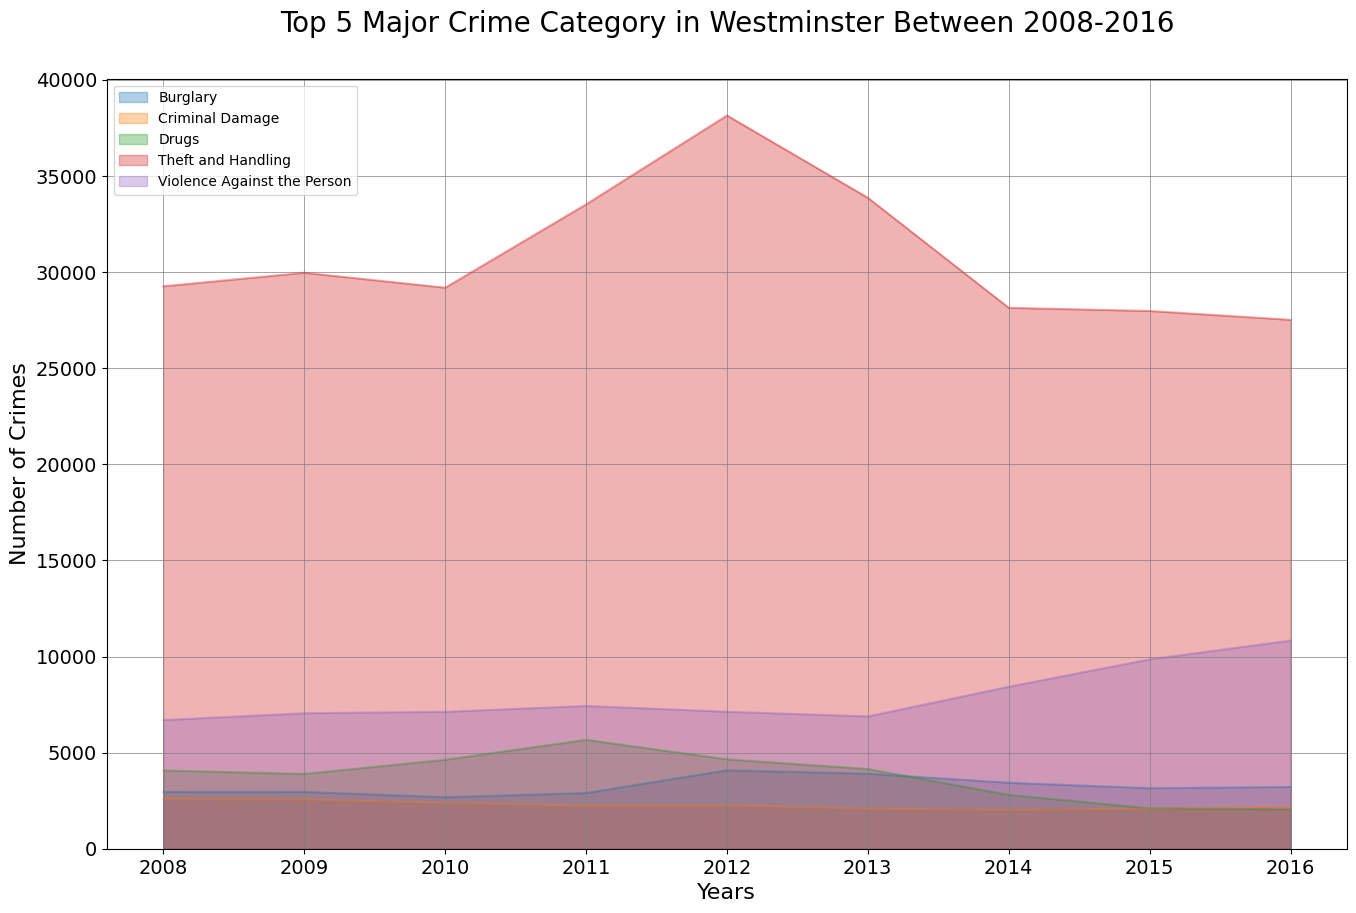

In [17]:
df_top5wmajor.index = df_top5wmajor.index.map(int)

df_top5wmajor.plot(kind='area', alpha=0.35, stacked=False, figsize=(16,10))

plt.title('Top 5 Major Crime Category in Westminster Between 2008-2016', fontsize = 20, y=1.05)
plt.xlabel('Years', fontsize = 16)
plt.ylabel('Number of Crimes', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid(color = "grey",linewidth=0.5)
plt.legend(loc="upper left")

plt.show()

Berdasarkan areaplot di atas, diketahui jika terdapat 5 kategori kejahatan dengan jumlah tertinggi di Westminster, yaitu Theft and Handling, Burglary, Criminal Damage, Drugs, dan Violence Against the Person. Dari kelima kategori tersebut, terlihat bahwa kategori Theft and Handling merupakan kategori kejahatan dengan jumlah tertinggi dibandingkan lainnya dari tahun 2008 hingga 2016. Dapat diketahui juga jika Theft and Handling mencapai jumlah tertinggi pada tahun 2012 dan mengalami penurunan pada 2013 dan 2014, lalu tidak mengalami kenaikan dan penurunan yang signifikan setelahnya.

<h4><b>Scatter Plot

<h4>Top Minor Category in Westminster from 2008 to 2016

In [18]:
data_wm_minor = df[['year','borough', 'major_category', 'minor_category', 'value']].loc[
    (df['borough']=='Westminster') & (df['major_category']=='Theft and Handling')]
data_wm_minor.head()

,year,borough,major_category,minor_category,value
21,2012,Westminster,Theft and Handling,Handling Stolen Goods,0
134,2014,Westminster,Theft and Handling,Motor Vehicle Interference & Tampering,1
165,2015,Westminster,Theft and Handling,Other Theft Person,0
187,2013,Westminster,Theft and Handling,Theft From Motor Vehicle,3
227,2016,Westminster,Theft and Handling,Theft From Motor Vehicle,6


In [19]:
data_wm_minor = data_wm_minor[['year','minor_category', 'value']].groupby(['year','minor_category']).agg({'value':'sum'})
data_wm_minor.head(40)

value
year minor_category                               
2008 Handling Stolen Goods                     105
     Motor Vehicle Interference & Tampering     31
     Other Theft                             16501
     Other Theft Person                       4121
     Theft From Motor Vehicle                 3026
     Theft From Shops                         3685
     Theft/Taking Of Motor Vehicle             621
     Theft/Taking of Pedal Cycle              1176
2009 Handling Stolen Goods                     115
     Motor Vehicle Interference & Tampering     24
     Other Theft                             16045
     Other Theft Person                       4932
     Theft From Motor Vehicle                 2234
     Theft From Shops                         4406
     Theft/Taking Of Motor Vehicle             481
     Theft/Taking of Pedal Cycle              1730
2010 Handling Stolen Goods                      82
     Motor Vehicle Interference & Tampering     34
     Other Theft                             15906
     Other Theft Person                       5015
     Theft From Motor Vehicle                 2192
     Theft From Shops                         3815
     Theft/Taking Of Motor Vehicle             543
     Theft/Taking of Pedal Cycle              1604
2011 Handling Stolen Goods                     117
     Motor Vehicle Interference & Tampering     36
     Other Theft                             17872
     Other Theft Person                       7243
     Theft From Motor Vehicle                 2394
     Theft From Shops                         3840
     Theft/Taking Of Motor Vehicle             496
     Theft/Taking of Pedal Cycle              1531
2012 Handling Stolen Goods                     104
     Motor Vehicle Interference & Tampering    125
     Other Theft                             19556
     Other Theft Person                       9228
     Theft From Motor Vehicle                 2519
     Theft From Shops                         4378
     Theft/Taking Of Motor Vehicle             586
     Theft/Taking of Pedal Cycle              1656

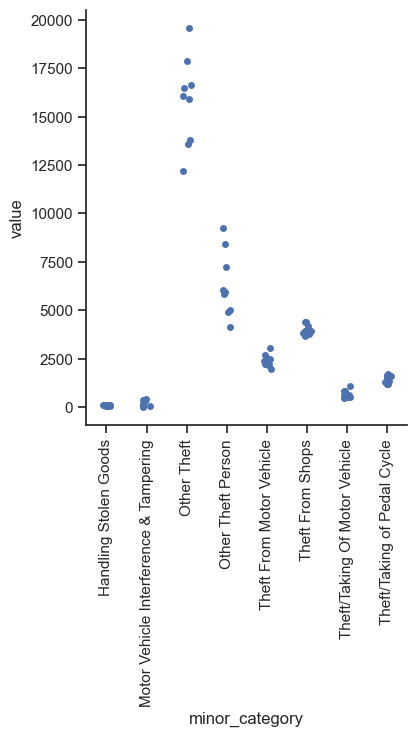

In [20]:
sns.set_theme(style="ticks", color_codes=True)
minor_plot = sns.catplot(x="minor_category", y="value", data=data_wm_minor.reset_index())
minor_plot.set_xticklabels(rotation=90)

Berdasarkan hasil yang diperoleh, didapatkan bahwa Other theft dan Other theft person memiliki angka kejadian yang lebih tinggi dibandingkan dengan kejadian yang tergolong dalam Handling Stolen Goods, Motor Vehicle Interference & Tampering, dan Theft From Shops.

<h4><b> Word Cloud

<h4>Top Borough with the Highest Number of Other Theft Category from 2008 until 2016

In [21]:
data_wm_minor = df[['year','borough', 'minor_category', 'value']].loc[
    (df['minor_category']=='Other Theft')]
data_wm_minor.head()

,year,borough,minor_category,value
5,2012,Ealing,Other Theft,0
43,2014,Croydon,Other Theft,1
132,2010,Lambeth,Other Theft,0
159,2014,Southwark,Other Theft,1
174,2008,Haringey,Other Theft,1


In [22]:
df_minor = data_wm_minor.groupby(['borough','year']).sum()
df_minor.reset_index(inplace=True)
df_min = df_minor.pivot(index='year', columns='borough', values='value')
df_min.columns.name=None
df_min

C:\Users\tsaab\AppData\Local\Temp\ipykernel_7652\1150388965.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_minor = data_wm_minor.groupby(['borough','year']).sum()


,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
year,,,,,,,,,,,,,,,,,,,,,
2008,1597,2704,1400,2185,2482,7220,0,3159,2675,1826,...,1524,2917,1943,1402,4599,1569,3336,2084,3325,16501
2009,1515,2744,1291,2323,2133,7240,0,2979,2494,1778,...,1449,2745,2053,1368,3845,1248,3143,2121,3147,16045
2010,1773,2962,1446,2400,2342,8066,0,3548,2985,1812,...,1660,3386,2180,1433,4321,1455,3529,3047,3045,15906
2011,1860,3094,1366,2830,2671,8551,26,3887,3163,2134,...,1579,3347,2403,1603,4965,1538,3904,2963,2916,17872
2012,2262,4148,1658,3113,3192,8295,68,4834,4034,2737,...,1936,4766,2968,1690,5427,1480,4345,3642,3899,19556
2013,1965,3713,1453,2794,2842,7057,34,3970,3586,2744,...,1721,4079,2751,1479,5309,1322,4067,3122,3526,16620
2014,1940,3600,1414,2929,2771,5990,40,3884,3343,3158,...,1597,4105,2592,1466,4720,1399,3533,3018,3264,13790
2015,1908,3436,1400,2970,2825,6140,43,3557,3415,2822,...,1690,4072,2420,1278,4824,1204,3542,2813,3470,13570
2016,1920,3565,1481,3235,2677,5706,59,3203,3470,2791,...,1544,3872,2450,1389,4869,1133,3596,2652,3364,12172


In [23]:
df_min.isnull().any()

Barking and Dagenham      False
Barnet                    False
Bexley                    False
Brent                     False
Bromley                   False
Camden                    False
City of London            False
Croydon                   False
Ealing                    False
Enfield                   False
Greenwich                 False
Hackney                   False
Hammersmith and Fulham    False
Haringey                  False
Harrow                    False
Havering                  False
Hillingdon                False
Hounslow                  False
Islington                 False
Kensington and Chelsea    False
Kingston upon Thames      False
Lambeth                   False
Lewisham                  False
Merton                    False
Newham                    False
Redbridge                 False
Richmond upon Thames      False
Southwark                 False
Sutton                    False
Tower Hamlets             False
Waltham Forest            False
Wandswor

In [24]:
df_min['City of London'] = df_min['City of London'].fillna(0)
df_min

,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
year,,,,,,,,,,,,,,,,,,,,,
2008,1597,2704,1400,2185,2482,7220,0,3159,2675,1826,...,1524,2917,1943,1402,4599,1569,3336,2084,3325,16501
2009,1515,2744,1291,2323,2133,7240,0,2979,2494,1778,...,1449,2745,2053,1368,3845,1248,3143,2121,3147,16045
2010,1773,2962,1446,2400,2342,8066,0,3548,2985,1812,...,1660,3386,2180,1433,4321,1455,3529,3047,3045,15906
2011,1860,3094,1366,2830,2671,8551,26,3887,3163,2134,...,1579,3347,2403,1603,4965,1538,3904,2963,2916,17872
2012,2262,4148,1658,3113,3192,8295,68,4834,4034,2737,...,1936,4766,2968,1690,5427,1480,4345,3642,3899,19556
2013,1965,3713,1453,2794,2842,7057,34,3970,3586,2744,...,1721,4079,2751,1479,5309,1322,4067,3122,3526,16620
2014,1940,3600,1414,2929,2771,5990,40,3884,3343,3158,...,1597,4105,2592,1466,4720,1399,3533,3018,3264,13790
2015,1908,3436,1400,2970,2825,6140,43,3557,3415,2822,...,1690,4072,2420,1278,4824,1204,3542,2813,3470,13570
2016,1920,3565,1481,3235,2677,5706,59,3203,3470,2791,...,1544,3872,2450,1389,4869,1133,3596,2652,3364,12172


In [25]:
df_min = df_min.transpose()
df_min['Total'] = df_min.sum(axis=1)
df_min

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
Barking and Dagenham,1597,1515,1773,1860,2262,1965,1940,1908,1920,16740
Barnet,2704,2744,2962,3094,4148,3713,3600,3436,3565,29966
Bexley,1400,1291,1446,1366,1658,1453,1414,1400,1481,12909
Brent,2185,2323,2400,2830,3113,2794,2929,2970,3235,24779
Bromley,2482,2133,2342,2671,3192,2842,2771,2825,2677,23935
Camden,7220,7240,8066,8551,8295,7057,5990,6140,5706,64265
City of London,0,0,0,26,68,34,40,43,59,270
Croydon,3159,2979,3548,3887,4834,3970,3884,3557,3203,33021
Ealing,2675,2494,2985,3163,4034,3586,3343,3415,3470,29165
Enfield,1826,1778,1812,2134,2737,2744,3158,2822,2791,21802


In [26]:
total_value = df_min['Total'].sum()
total_value

980085

In [27]:
max_words = 65
word_string = ''
for country in df_min.index.values:
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_min.loc[country,'Total']/float(total_value)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)

word_string

'Barnet Brent Bromley Camden Camden Camden Camden Croydon Croydon Ealing Enfield Greenwich Hackney Hackney Haringey Havering Hillingdon Hillingdon Hounslow Islington Islington Lambeth Lambeth Lewisham Newham Newham Redbridge Southwark Southwark Wandsworth Westminster Westminster Westminster Westminster Westminster Westminster Westminster Westminster Westminster '

In [28]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white').generate(word_string)

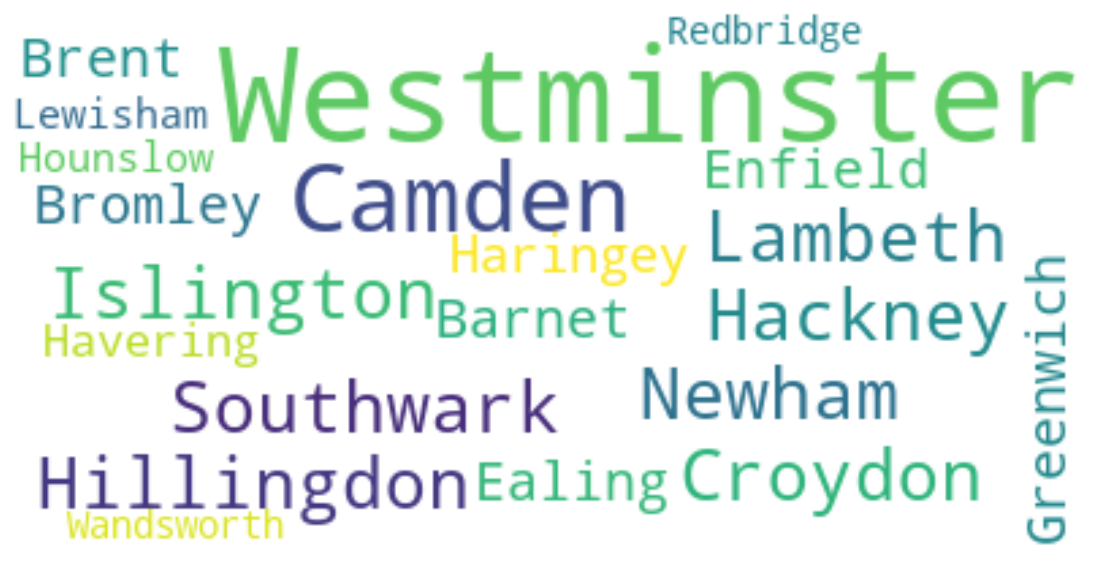

In [29]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Berdasarkan word cloud diatas dapat disimpulkan bahwa daerah dengan tindak kriminal kategori 'Other Theft' terbanyak pada tahun 2008 hingga 2016 adalah daerah Westminster lalu diikuti daerah Camden, Lambeth, dan Southwark.

<h4><b>Box Plot

<h4>Box Plot of Westminster's Other Theft in 2012

In [30]:
df1 = df['year'] == 2012
df_2012 = df[df1]
df_2012

,lsoa_code,borough,major_category,minor_category,value,year,month
5,E01001320,Ealing,Theft and Handling,Other Theft,0,2012,5
15,E01002358,Havering,Violence Against the Person,Wounding/GBH,0,2012,2
20,E01003651,Redbridge,Violence Against the Person,Harassment,0,2012,2
21,E01004660,Westminster,Theft and Handling,Handling Stolen Goods,0,2012,2
24,E01001301,Ealing,Theft and Handling,Other Theft Person,2,2012,1
...,...,...,...,...,...,...,...
13490559,E01002257,Havering,Other Notifiable Offences,Other Notifiable,0,2012,8
13490563,E01004353,Waltham Forest,Violence Against the Person,Offensive Weapon,0,2012,12
13490590,E01001679,Greenwich,Theft and Handling,Theft/Taking Of Motor Vehicle,1,2012,4
13490595,E01001144,Croydon,Violence Against the Person,Harassment,0,2012,1


In [31]:
data_wm_minor = df_2012[['year','month','borough', 'minor_category', 'value']].loc[
    (df['borough']=='Westminster') & (df['minor_category']=='Other Theft')]
data_wm_minor.head()

,year,month,borough,minor_category,value
785,2012,7,Westminster,Other Theft,1
3950,2012,2,Westminster,Other Theft,5
23486,2012,11,Westminster,Other Theft,38
47004,2012,5,Westminster,Other Theft,0
48606,2012,4,Westminster,Other Theft,0


In [32]:
data_wm_minor = data_wm_minor[['year','month','value']].groupby(['year','month']).agg({'value':'sum'})
data_wm_minor.head(12)

value
year month       
2012 1       1816
     2       1531
     3       1938
     4       1491
     5       1678
     6       1597
     7       1691
     8       1559
     9       1309
     10      1594
     11      1619
     12      1733

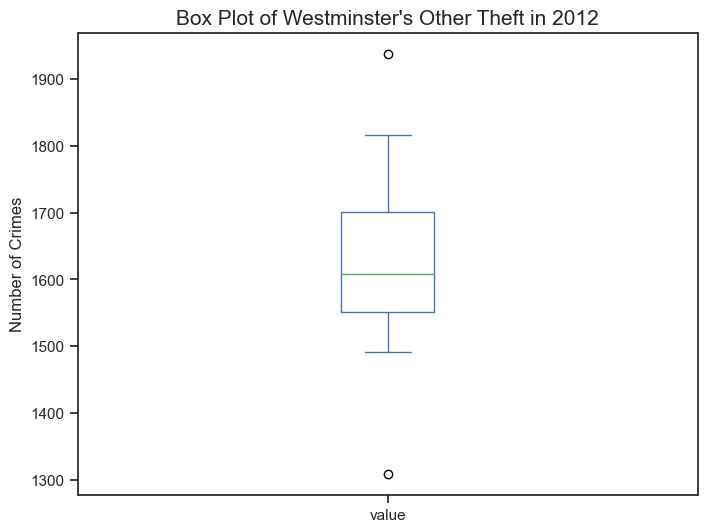

In [33]:
data_wm_minor.plot(kind='box', figsize=(8,6))
plt.title("Box Plot of Westminster's Other Theft in 2012", fontsize=15)
plt.ylabel("Number of Crimes")
plt.show()

Berdasarkan hasil yang diperoleh, didapatkan jika angka rata-rata kejadian tindak kriminal untuk Other Theft di Westminster pada 2012, yaitu sekitar lebih dari 1600 kejadian setiap bulannya dengan angka tertinggi kejadian lebih dari 1900 kasus dan terendah sekitar 1300 kasus.

<h4><b>Histogram

<h4> Frequency Distribution of the Number of Crimes in 4 Boroughs with the Highest Number in 2012

In [34]:
df1 = df['year'] == 2012
df_2012 = df[df1]
df_2012

,lsoa_code,borough,major_category,minor_category,value,year,month
5,E01001320,Ealing,Theft and Handling,Other Theft,0,2012,5
15,E01002358,Havering,Violence Against the Person,Wounding/GBH,0,2012,2
20,E01003651,Redbridge,Violence Against the Person,Harassment,0,2012,2
21,E01004660,Westminster,Theft and Handling,Handling Stolen Goods,0,2012,2
24,E01001301,Ealing,Theft and Handling,Other Theft Person,2,2012,1
...,...,...,...,...,...,...,...
13490559,E01002257,Havering,Other Notifiable Offences,Other Notifiable,0,2012,8
13490563,E01004353,Waltham Forest,Violence Against the Person,Offensive Weapon,0,2012,12
13490590,E01001679,Greenwich,Theft and Handling,Theft/Taking Of Motor Vehicle,1,2012,4
13490595,E01001144,Croydon,Violence Against the Person,Harassment,0,2012,1


In [35]:
month = df_2012.drop(["lsoa_code","major_category","minor_category","year"], axis=1)
month.set_index("month", inplace=True)
month = month.groupby("borough").sum()
month = month.sort_values(by="value", ascending=False).head(4)
month

,value
borough,
Westminster,59226
Lambeth,33473
Camden,31472
Southwark,30737


In [36]:
df_f = df_2012.drop(["lsoa_code","major_category","minor_category"], axis=1).set_index("borough")
df_f = df_f.loc[month.index]
df_f = pd.pivot_table(df_f, values="value", aggfunc=np.sum, index="month", columns="borough")
df_f

borough,Camden,Lambeth,Southwark,Westminster
month,,,,
1,2617,3154,2558,5084
2,2401,2311,2465,4381
3,2918,2995,2714,5362
4,2598,2736,2234,4623
5,2970,2745,2731,5104
6,2645,2887,2695,4797
7,2855,2748,2719,5428
8,2513,2872,2619,5246
9,2264,2698,2349,4341


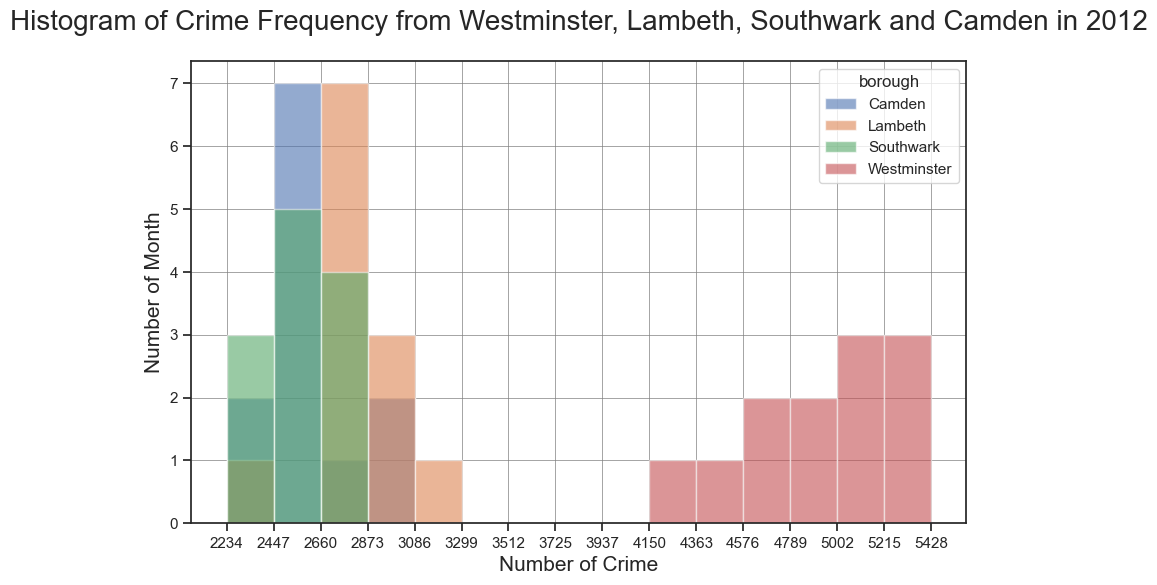

In [37]:
count, bin_edges = np.histogram(df_f, 15)

df_f.plot(kind='hist', figsize=(10,6),
         bins=15, alpha=0.6, xticks=bin_edges)

plt.title("Histogram of Crime Frequency from Westminster, Lambeth, Southwark and Camden in 2012", fontsize=20, y=1.05)
plt.xlabel("Number of Crime", fontsize=15)
plt.ylabel("Number of Month", fontsize=15)
plt.grid(color="grey", linewidth=0.5)
plt.show()

Pada Histogram diatas dapat dilihat bahwa distribusi tindak kriminal di daerah Westminster adalah yang terbanyak dan termasuk kasus yang beda jauh dengan kota lainnya. Lalu untuk daerah Lambeth, Southwark, dan Camden jumlah kasus yang terjadi hampir sama.

<h4><b>Folium Map

<h4>Number of Crime Maps

In [38]:
london_map = folium.Map(location=[51.507351, -0.127758], zoom_start=10)
london_map

In [39]:
df2 = df[['borough','value']]
london_geo = r'https://raw.githubusercontent.com/radoi90/housequest-data/master/london_boroughs.geojson' 
map = folium.Map(location=[51.507351, -0.127758], zoom_start=11)
folium.Choropleth(
    geo_data=london_geo,
    data=df2,
    columns=["borough", "value"],
    key_on="feature.properties.name",
    fill_color="YlOrRd",
    fill_opacity=0.5,
    line_opacity=0.2,
    legend_name="Crime rate in boroughs of London",
    highlight=True,
).add_to(map)

map

Jumlah kasus kriminal dari suatu wilayah dapat dilihat berdasarkan warnanya. semakin gelap (merah) warnanya, makan semakin tinggi jumlah kasus kriminal yang terjadi di wilayah tersebut. Sebaliknya, semakin cerah (kuning) warna wilayahnyanya, maka semakin rendah jumlah kasus kriminal di wilayah tersebut.

<br>

<h4><b>Overall Analysis

* Westminster merupakan wilayah dengan jumlah kasus kriminal tertinggi pada tahun 2008 hingga 2016.
* Persentase kategori kejahatan terbesar di Westminster pada tahun 2008 hingga 2016 adalah Theft and Handling yakni sebesar 29.2% dan terendah adalah kategori Sexual Offence dengan persentasenya yaitu 1.0%.
* Untuk tipe kejahatan berat terdapat 5 kategori kejahatan dengan jumlah tertinggi di Westminster pada tahun 2008 hingga 2016, yaitu Theft and Handling, Burglary, Criminal Damage, Drugs, dan Violence Against the Person. Dari kelima kategori tersebut, kategori Theft and Handling merupakan kategori kejahatan dengan jumlah tertinggi dibandingkan dengan lainnya.
* Untuk tipe kejahatan ringan kategori kejahatan Other theft dan Other theft person memiliki angka kejadian yang lebih tinggi dibandingkan dengan kejadian yang tergolong dalam Handling Stolen Goods, Motor Vehicle Interference & Tampering, dan Theft From Shops.
* Daerah dengan tindak kriminal kategori Other Theft terbanyak pada tahun 2008 hingga 2016 adalah daerah Westminster. Lalu diikuti daerah Camden, Lambeth, dan Southwark.
* Angka rata-rata kejadian tindak kriminal untuk Other Theft di Westminster pada 2012, yaitu sekitar lebih dari 1600 kejadian setiap bulannya dengan angka tertinggi kejadian lebih dari 1900 kasus dan terendah sekitar 1300 kasus.
* Distribusi tindak kriminal di daerah Westminster adalah yang terbanyak dan termasuk kasus yang beda jauh dengan kota lainnya. Lalu untuk daerah Lambeth, Southwark, dan Camden jumlah kasus yang terjadi hampir sama.
